In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import mpld3
import pandas as pd
import numpy as np
import imp
from mpl_toolkits.basemap import Basemap
import mplleaflet
import pymc3 as pm
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sn.set_context('talk')

In [ ]:
# Optionally suppress warnings in the final version of the notebook
import warnings
warnings.filterwarnings('ignore')

# ECOREG full analysis (part 3: relationships)

This notebook follows on from the work described [here](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_full_analysis_1.ipynb) and [here](http://nbviewer.jupyter.org/github/JamesSample/ECOREG/blob/master/ecoreg_full_analysis_2.ipynb). In the first notebook, PCA was used to identify a subset of potentially interesting parameters with reduced collinearity; in the second, potentially interesting patterns highlighted by the PCA were explored by testing for differences between regulated and unregulated sites. In this notebook, I want to explore relationships between the variables, following up on hypotheses developed in notebooks 1 and 2.

In [2]:
# Read basic datasets

# Hydro indicators
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\hydro_indic.xlsx'
hi_df = pd.read_excel(in_xls, sheetname='hydro_indic', index_col=0)
hi_df = hi_df.query('(eco_dataset == "pb") and (time_per == 3)')

# Site props
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\site_props.xlsx'
site_df = pd.read_excel(in_xls, sheetname='site_props', index_col=0)

# MZB
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\mzb_chem_ecol.xlsx'
mzb_df = pd.read_excel(in_xls, sheetname='mzb_data', index_col=0)

# PB
in_xls = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Stats_Input_Data\pb_chem_ecol.xlsx'
pb_df = pd.read_excel(in_xls, sheetname='pb_data', index_col=0)

In [3]:
# Import custom functions
func_path = r'C:\Data\James_Work\Staff\Susi_S\ECOREG\Python\ECOREG\ecoreg_code.py'

ecoreg = imp.load_source('ecoreg_code', func_path)

## 6. Correlation matrices

### 6.1. Germany

### 6.2. Norway

#### 6.2.1. PB abundance versus CV

In [ ]:
#cols = ['abund', 'n_taxa', 'n_genera', 'sessil', 'acti_filt_feed',
#        'swim_div', 'p50', 'cv', 'revs_per_yr', 'av_rise_rt', 
#        'av_fall_rt', 'tn', 'toc', 'country', 'regulated']
#df = pd.concat([site_df, mzb_df, hi_df], axis=1)[cols]
#df = df.query('country == "N"')
#
#df.head()

In [ ]:
#df2 = df.copy()
#del df2['regulated']
#sn.pairplot(df2, diag_kind='kde')

In [8]:
cols = ['n_taxa', 'tn', 'toc', 'cond', 'mean', 'range', 'max12', 
        'revs_per_yr', 'days_to_p95', 'days_to_max', 'max10', 
        'country', 'regulated', 'cv', 'p50']
df = pd.concat([site_df, mzb_df, hi_df], axis=1)[cols]
df = df.query('country == "N"')

#sn.pairplot(df, hue='regulated', diag_kind='kde')

df.head()

,n_taxa,tn,toc,cond,mean,range,max12,revs_per_yr,days_to_p95,days_to_max,max10,country,regulated,cv,p50
S109.2,20.0,0.285,0.85,52.2,31.613410,655.79835,17.27617,132.000000,84,828,33.35955,N,1,1.405250,16.02159
S109.21,23.0,0.099,0.72,30.7,3.576798,49.58114,1.41556,138.333333,83,827,4.63132,N,0,1.340999,1.79043
S109.9,24.0,0.054,0.69,36.2,19.490855,334.40153,5.01335,120.333333,83,827,26.58150,N,0,1.507076,6.62810
S12.137,41.0,0.155,1.20,14.9,25.628777,214.85086,28.86813,176.333333,75,822,176.84978,N,1,0.914427,18.88433
S12.200,34.0,0.255,2.70,31.5,25.806984,496.59644,15.78188,97.666667,25,111,128.84639,N,1,1.411023,14.76677


In [ ]:
# Lists of explan and resp vars
exp_vars = ['tn', 'cond', 'mean']
resp_var = 'n_taxa'

# OLS
res = ecoreg.mlr(df, exp_vars, resp_var, 
                 method='ridge', fit_intercept=True, 
                 kcv=3, normalize=False)
res

                            OLS Regression Results                            
Dep. Variable:                 n_taxa   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                    0.3393
Date:                Wed, 21 Dec 2016   Prob (F-statistic):              0.885
Time:                        17:48:55   Log-Likelihood:                -144.96
No. Observations:                  40   AIC:                             301.9
Df Residuals:                      34   BIC:                             312.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept            0          0        nan      

C:\Data\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\patsy\util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
C:\Data\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\patsy\util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):
C:\Data\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\patsy\util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
C:\Data\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\patsy\util.py:679: DeprecationWarning: pandas.core.common.is

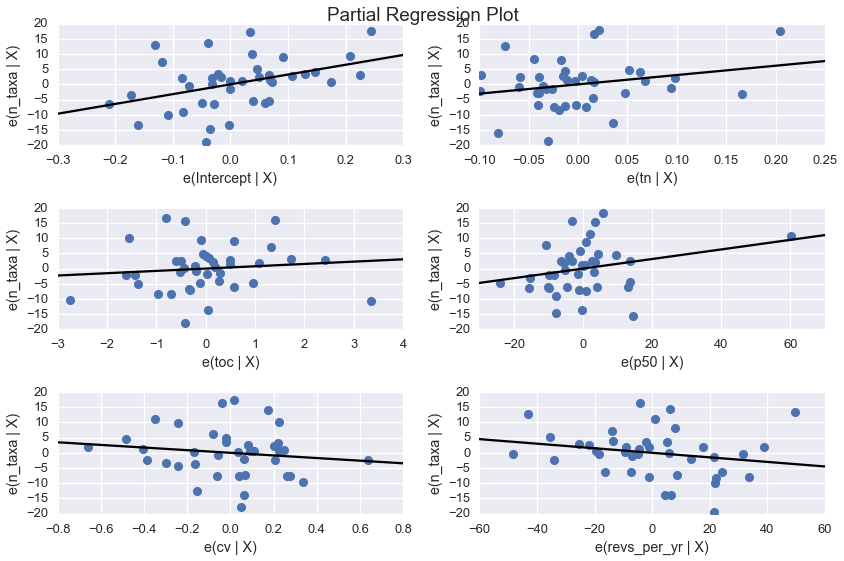

In [13]:
mod_str = 'n_taxa ~ tn + toc + p50 + cv + revs_per_yr'

# Regression. Pass alpha=0 for OLS. Larger alpha gives a bigger penalty on the
# size of the parameter estimates
model = smf.ols(mod_str, data=df).fit_regularized(alpha=1, l1_wt=0)

print model.summary()

# Plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [ ]:
# Robust Bayesian regression
var_map = {'x':'toc',
           'y':'n_taxa'}

res = ecoreg.robust_lin_reg(df, var_map, plot_trace=True,
                            plot_vars=True, mcmc='slice', 
                            steps=10000)